#### Projeto III - Transformada de Fourier

<h5>Aluno: João Victor Soares de Almeida<h5>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.signal as ss
from scipy import signal

In [22]:
Fs = 10  # The sampling frequency we use for the simulation
t0 = 5     # The half time interval we look at
t = np.arange(-t0, t0, 1/Fs)  # the time samples
f = np.arange(-Fs/2, Fs/2, Fs/len(t))  # the corresponding frequency samples

def ft(samples, Fs, t0):
    """Approximate the Fourier Transform of a time-limited signal 
    by means of the discrete Fourier Transform.
    
    samples: signal values sampled at the positions t0 + n/Fs
    Fs: Sampling frequency of the signal
    
    t0: starting time of the sampling of the signal
    """
    f = np.linspace(-Fs/2, Fs/2, len(samples), endpoint=False)
    return np.fft.fftshift(np.fft.fft(samples)/Fs * np.exp(-2j*np.pi*f*t0))

<h3>Exemplo 8.1<h3>

<centering>No exemplo 8.1 implementaremos a função que nos foi dada, para isso definimos o sinal $h$ - que é nosso sinal original - atendendo as suas restrições, ou seja, $h > 0$, logo em seguida calculamos o diagrama de módulo e de fase, implementando suas funções respectivamente. Por fim, plotamos os gráficos que representam cada função. <centering>

- Tivemos o Diagrama de Fase e Módulo, pois a função que nos foi concedida tem parte real e imaginária. Por fim, plotamos os gráficos sugeridos

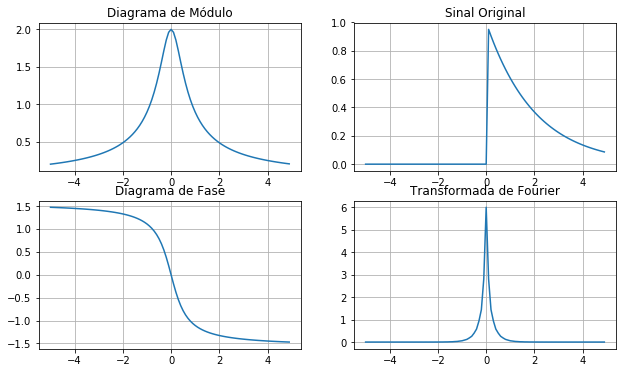

In [24]:
func_original = lambda t: np.exp(-a*t) * np.heaviside(t, 1)
diag_mod = lambda w: 1 / np.sqrt(a**2 + w**2)
diag_fase = lambda w: np.arctan(w/a)
a = 0.5

plt.figure(figsize=(16, 6))
plt.subplot(232)
plt.grid(True)
plt.title("Sinal Original")
plt.plot(t, func_original(t))

plt.subplot(231)
plt.grid(True)
plt.title("Diagrama de Módulo")
plt.plot(f, diag_mod(t))

plt.subplot(234)
plt.grid(True)
plt.title("Diagrama de Fase")
plt.plot(f, -diag_fase(t))

plt.subplot(235)
plt.grid(True)
plt.title("Transformada de Fourier")
plt.plot(f, ft(diag_mod(t), Fs, t0).real)

<h3>Exemplo 8.2<h3>


<centering>No exemplo 8.2 implementaremos a função que nos foi dada, para isso definimos o sinal $func_original$ - que é nosso sinal original - atendendo as suas restrições, ou seja, $ a > 0$, logo em seguida calculamos o diagrama de módulo e de fase, implementando suas funções respectivamente. Por fim, plotamos os gráficos que representam cada função. <centering>

- Para o Diagrama de fase, implementamos condições para que o gráfico fosse gerado de forma correta, ou seja, se  $-a < w < a  = 0 $ caso contrário, o valor seria $- \pi$  
- Tivemos o Diagrama de Fase e Módulo, pois a função que nos foi concedida tem parte real e imaginária. Por fim, plotamos os gráficos sugeridos

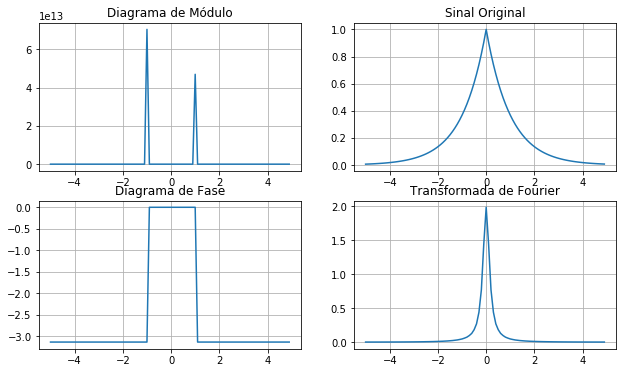

In [25]:
func_original1= lambda t: np.exp(-a*np.abs(t))
diag_mod1 = lambda w: (2*a) / np.abs((a**2 - w**2))

def diag_fase1(t):
    valor = []
    for i in t:
        if(-a < i < a):
            valor.append(0)
        else:
            valor.append(-np.pi)
    return valor

a = 1

plt.figure(figsize=(16, 6))
plt.subplot(232)
plt.grid(True)
plt.title("Sinal Original")
plt.plot(t, func_original1(t))

plt.subplot(231)
plt.grid(True)
plt.title("Diagrama de Módulo")
plt.plot(f, diag_mod1(t))

plt.subplot(234)
plt.grid(True)
plt.title("Diagrama de Fase")
plt.plot(f, diag_fase1(t))

plt.subplot(235)
plt.grid(True)
plt.title("Transformada de Fourier")
plt.plot(f, ft(func_original1(t), Fs, t0).real)

<h3>Exemplo 8.3<h3>

Neste exemplo foi dada uma função cujo gráfico representa um "pulso quadrado". Então, na implementação abaixo na **func_original** representamos o sinal de um pulso quadrado e nas demais escrevemos tanto o Diagrama de Fase, quanto o Diagrama de Módulo e a Transformada de Fourier.

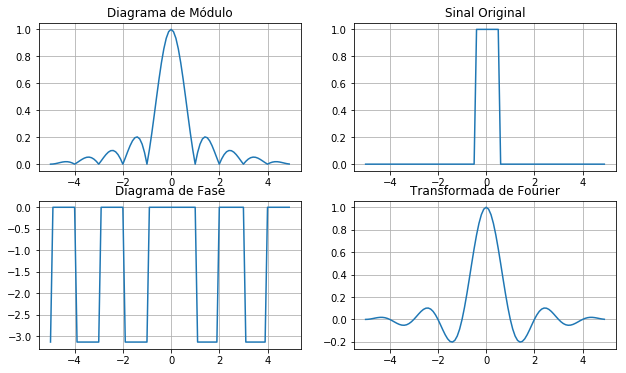

In [27]:
diag_fase2= lambda w: -np.pi * ((ft(func_original2(w), Fs, t0).real) < 0)
def func_original2(t): 
    a = 0.5
    return 1*(np.abs(t) < a)

plt.figure(figsize=(16, 6))
plt.subplot(232)
plt.grid(True)
plt.title("Sinal Original")
plt.plot(t, func_original2(t))

plt.subplot(231)
plt.grid(True)
plt.title("Diagrama de Módulo")
plt.plot(f, np.abs(ft(func_original2(t), Fs, t0).real))

plt.subplot(234)
plt.grid(True)
plt.title("Diagrama de Fase")
plt.plot(f, diag_fase2(t))

plt.subplot(235)
plt.grid(True)
plt.title("Transformada de Fourier")
plt.plot(f, ft(func_original2(t), Fs, t0).real)

<h3>Exemplo 8.4<h3>

Como neste exemplo na transformada de Fourier só teremos a parte complexa, não teremos o Diagrama de Fase e de Módulo. Abaixo plotaremos os gráficos para visualização. Para isso também iremos nos ater-se a algumas definições matemáticas,

- Se f(t) é uma função par então F(ω) é uma função real. Por outro lado, se f(t) é uma função ímpar então F(ω) é uma função imaginária

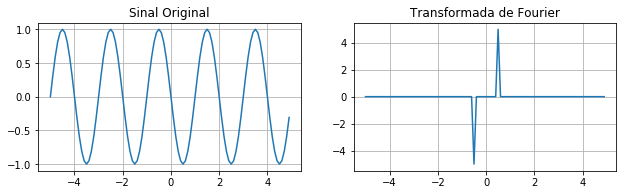

In [28]:
func_original3 = lambda t: np.sin(-np.pi*t)


# Sinal original
plt.figure(figsize=(16, 6))
plt.subplot(232)
plt.grid(True)
plt.title("Sinal Original")
plt.plot(t, func_original3(t))

# transformada de Fourier
plt.subplot(233)
plt.grid(True)
plt.title("Transformada de Fourier")
plt.plot(f, ft(func_original3(t), Fs, t0).imag)

<h3>Exemplo 8.5<h3>

Semelhante ao exemplo anterior, só teremos a Transformada de Fourier. Por essas funções serem casos especiais para Transformada de Fourier.

- A parte real de F(ω) é uma função par:
    - A afirmação anterior implica que A(ω) = A(−ω) e pode ser facilmente provado da seguinte forma:
    - $$A(−ω) = \int_{-\infty}^{+\infty} f(t)Cos((−ωt)dt =\int_{-\infty}^{+\infty} f(t) Cos(ωt)dt = A(ω)$$

já que Cos(−ωt) = Cos(ωt)

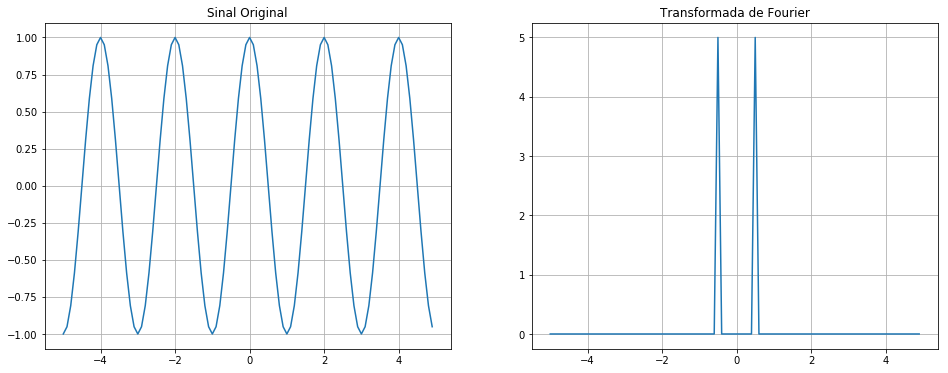

In [29]:
func_original4 = lambda t: np.cos(np.pi*t)


plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.grid(True)
plt.title("Sinal Original")
plt.plot(t, func_original4(t))

plt.subplot(122)
plt.grid(True)
plt.title("Transformada de Fourier")
plt.plot(f, ft(func_original4(t), Fs, t0).real)

<h3>Exemplo 8.6<h3>

Nesse exemplo voltaremos a utilizar o "pulso quadrado"  e faremos uma versão estendendida do sinal para analisa-lo. Por fim, plotamos os gráficos referente a cada tipo de sinal.

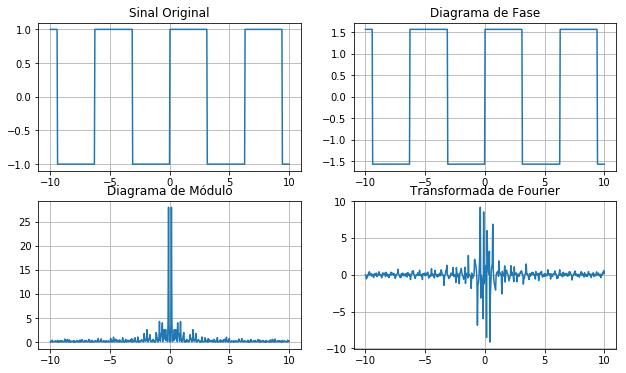

In [6]:
t = np.linspace(-10, 10, 500)
y = ss.square(t, duty= 0.5)
y = [-1 if i <= 0 else 1 for i in y]
plt.figure(figsize=(16, 6))
plt.subplot(231)
plt.grid(True)
plt.title("Sinal Original")
plt.plot(t, y)

fase_y = [-np.pi/2 if i <= 0 else np.pi/2 for i in y]
plt.subplot(232)
plt.grid(True)
plt.title("Diagrama de Fase")
plt.plot(t, fase_y)

plt.subplot(234)
plt.grid(True)
plt.title("Diagrama de Módulo")
plt.plot(t, np.abs(ft(y, Fs, t0).real))

plt.subplot(235)
plt.grid(True)
plt.title("Transformada de Fourier")
plt.plot(t, ft(y, Fs, t0).imag)

<h3>Exemplo 8.7<h3>

Nesse exemplo também utilizamos o "pulso quadrado" a diferença está no fato das  condições que foram propostas na lei de formação em que o sinal foi estendido e tornou-se também periódico. Abaixo plotamos o sinal original e sua transformada

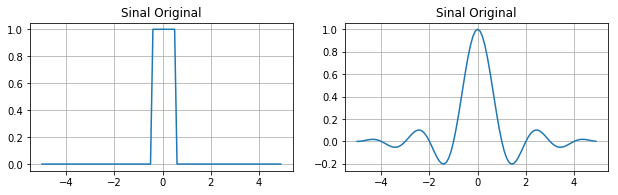

In [30]:
def func_original5(t): 
    a = 0.5
    return 1*(np.abs(t) < a)


plt.figure(figsize=(16, 6))
plt.subplot(231)
plt.grid(True)
plt.title("Sinal Original")
plt.plot(t, func_original5(t))

plt.subplot(232)
plt.grid(True)
plt.title("Sinal Original")
plt.plot(t, ft(func_original5(t), Fs, t0).real)

<h3>Exemplo 8.8<h3>

Neste exemplo utilizaremos o conceito de "*time shift*" e de "*transladação*". Como as transformadas de Fourier de x1(t) e de x2(t) são respectivamente X1(jω) e X2(jω), chegamos a conclusão que,

- $X_1(jw)= {sen{w \over 2}\over w} e \\ X_2(jw)= {sen{w \over 2}\over w}$

Por fim, plotamos os respectivos gráficos sugeridos pelo exemplo

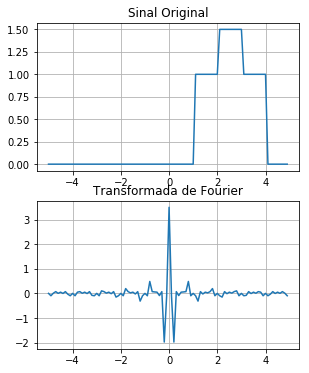

In [31]:
func_original6 = lambda t: np.heaviside(t-1, 1) + (0.5*np.heaviside(t-2, 1) - 0.5*np.heaviside(t-3, 1)) - np.heaviside(t-4, 1)

plt.figure(figsize=(16, 6))
plt.subplot(231)
plt.grid(True)
plt.title("Sinal Original")
plt.plot(t, func_original6(t))

plt.subplot(234)
plt.grid(True)
plt.title("Transformada de Fourier")
plt.plot(f, ft(func_original6(t), Fs, t0).real)

<h3>Exemplo 8.9<h3>

Neste exemplo voltamos a utilizar o a função do exemplo 8.2, só que agora utilizando descrições matemáticas diferente, porém chegaremos ao mesmo resultado. A seguir plotaremos os gráficos para ratificar.

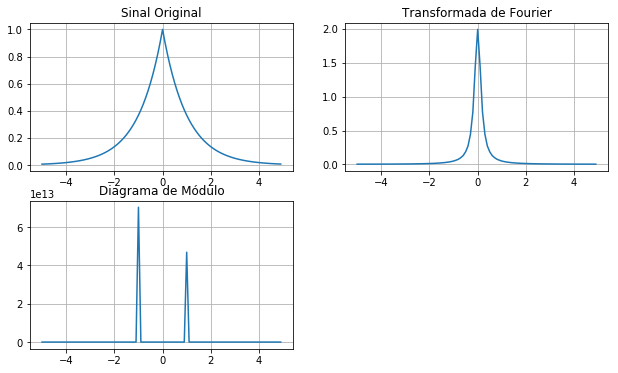

In [32]:
func_original7 = lambda t: np.exp(-a*np.abs(t)) * (a > 0)
diag_modulo = lambda w: (2*a) / np.abs((a**2 - w**2))
a = 1

plt.figure(figsize=(16, 6))
plt.subplot(231)
plt.grid(True)
plt.title("Sinal Original")
plt.plot(t, func_original7(t))

plt.subplot(232)
plt.grid(True)
plt.title("Transformada de Fourier")
plt.plot(f, ft(func_original7(t), Fs, t0).real)

plt.subplot(234)
plt.grid(True)
plt.title("Diagrama de Módulo")
plt.plot(f, diag_modulo(t))

<h3>Exemplo 8.10 e 8.11<h3>

Nos exemplos **8.10 e 8.11** utilizaremos a mesma função que é o degrau unitário, porém utilizaremos a propriedade da derivada e a da integral, o material de estudo proposto pelo professor nos diz que se $x(t)$ é um sinal e que 

- $y(t) = {dx \over dt (t)}(t)$

Então, podemos dizer que:

- $Y(jw) = jw.X(jw)$

ou seja,

- $F{{dx \over dt}(t) = jw.F{{x(t)}}}$

e por fim a Transformada de Fourier de $y(t)$ é

- $Y(jw) = -w².X(jw)$


##### Exemplo 8.11

Suponhamos que $x(t)$ é um sinal e que,

-$y(t) = {\int_\inf^{t} x(t)dt}$ 

Então, podemos mostrar que,

- $F{{{\int_\inf^{t} x \tau d \tau = {1 \over jw}F{x(t)} + \pi X(0)u_0(w)}}}$


Então aplicando a função a transformada de Fourier temos que o resultado final é 1, ou seja, constante. Em seguida plotarei um gráfico para deixar mais visual o que foi discutindo matematicamente.

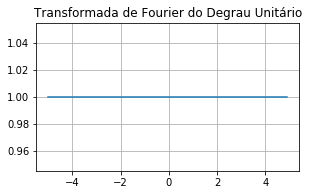

In [33]:
func_original8 = lambda t: np.exp(-j*w*t)

w = 0
j = 0
plt.figure(figsize=(16, 6))
plt.subplot(231)
plt.grid(True)
plt.title("Transformada de Fourier do Degrau Unitário")
plt.plot(t, func_original8(t))



<h3>Exemplo 8.12<h3>

O teorema da dualidade diz que a inversão de papéis é possível com o FT.
Literalmente, significa apenas que $x(t)$ é tomado como $X(t) e X(f)$ é tomado como $x(–f)$.  A declaração teorema é $X(t) \leftrightarrow x(-f)$

Abaixo plotaremos a os gráficos com as funções para demonstrar graficamente o teorema da dualidade

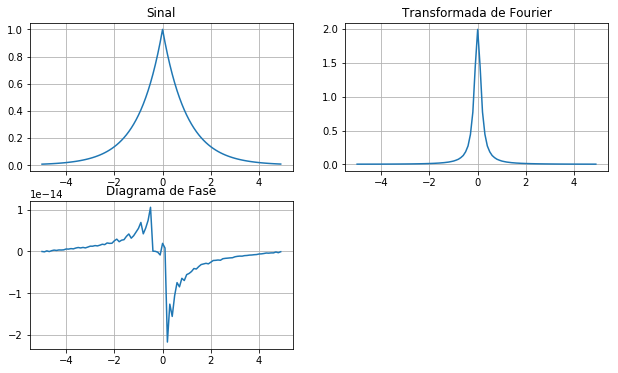

In [90]:
func_original12 = lambda t: np.exp(-np.abs(t))

plt.figure(figsize=(16, 6))
plt.subplot(231)
plt.grid(True)
plt.title("Sinal")
plt.plot(t, func_original12(t))

plt.subplot(232)
plt.grid(True)
plt.title("Transformada de Fourier")
plt.plot(f, ft(func_original12(t), Fs, t0).real)

plt.subplot(234)
plt.grid(True)
plt.title("Diagrama de Fase")
plt.plot(f, ft(func_original12(t), Fs, t0).imag)

<h3>Exemplo 8.13<h3>

Nesse exemplo faremos novamente um "*time shift*" para a transformada de Fourier e obteremos a resposta no domínio da frequência.

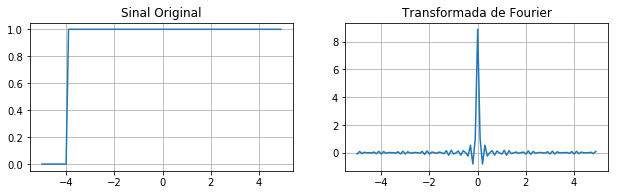

In [34]:
def func_original13(t):
    return np.heaviside((t+4),1)

plt.figure(figsize=(16, 6))
plt.subplot(231)
plt.grid(True)
plt.title("Sinal Original")
plt.plot(t, func_original13(t))

plt.subplot(232)
plt.grid(True)
plt.title("Transformada de Fourier")
plt.plot(f, ft(func_original13(t), Fs, t0).real)

<h3>Exemplo 8.14<h3>

No exemplo 8.14 é um exemplo genéricos, então o foco será explicar o exemplo que nos foi concedido sistema **SLITs**(Sistemas lineares e invariantes no tempo), onde para um sinal de entrada $x(t)$ a saída $y(t)$ é sua derivada

- $y(t) = {dx\over dt}(t)$

Utilizando a propriedade da derivada para transformada de Fourier temos que

- $$Y(jw) = F{y(t)} = jw.X(jw)$$

Logo, pela propriedade da convolução para a Transformada de Fourier, a resposta na frequência H(jw) é

- $$H(jw) = jw$$

<h3>Exemplo 8.15<h3>

No exemplo 8.15 é um exemplo genérico, então o foco será explicar o exemplo que nos foi concedido sistema SLITs(Sistemas lineares e invariantes no tempo) chamado de "integrador", em que para o sinal de entrada **x(t)** a saída **y(t)** é sua integral

- $y(t) ={\int_{- \infty}^{t} x(\tau) d\tau}$

Usando a propriedade da integral para a transformada de Fourier a resposta dos sistema na frequência será:

$$H(jw) = F{h(t)} = [{1\over jw} + \pi u_0(w)]$$

e usando a propriedade da convolução para a transformada de Fourier, temos que Y(jw), a TF da saída y(t) é descrita por

- $Y(jw) = H(jw)X(jw) = {1 \over jw}X(jw) + \pi X(0).u_0(w) $ 

<h3>Exemplo 8.16<h3>

Neste exemplo utilizaremos o filtro de "low pass band filter". Abaixo plotamos o gráfico da função original e no mais, também plotaremos o da transformada de Fourier pela propriedade da dualidade.

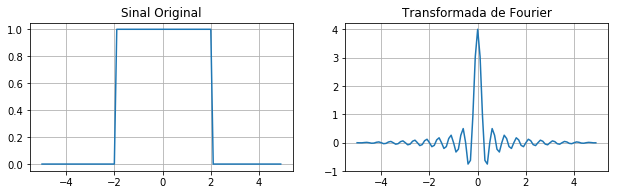

In [35]:
def func_original16(t):
    w_c= 2
    return 1*(np.abs(t) < w_c)




plt.figure(figsize=(16, 6))
plt.subplot(231)
plt.grid(True)
plt.title("Sinal Original")
plt.plot(t, func_original16(t))


plt.subplot(232)
plt.grid(True)
plt.title("Transformada de Fourier")
plt.plot(f, ft(func_original16(t), Fs, t0).real)